In [45]:
import pandas as pd
import numpy as np
import seaborn as sns

In [46]:
data = pd.read_csv('salariesnew.csv')

In [47]:
df = data.copy(deep=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    1000 non-null   object
 1   Age     1000 non-null   int64 
 2   Job     1000 non-null   object
 3   Salary  1000 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 31.4+ KB


In [49]:
df.isna().sum()

Name      0
Age       0
Job       0
Salary    0
dtype: int64

In [50]:
df.isnull().sum()

Name      0
Age       0
Job       0
Salary    0
dtype: int64

In [51]:
df.columns

Index(['Name', 'Age', 'Job', 'Salary'], dtype='object')

<Axes: ylabel='Age'>

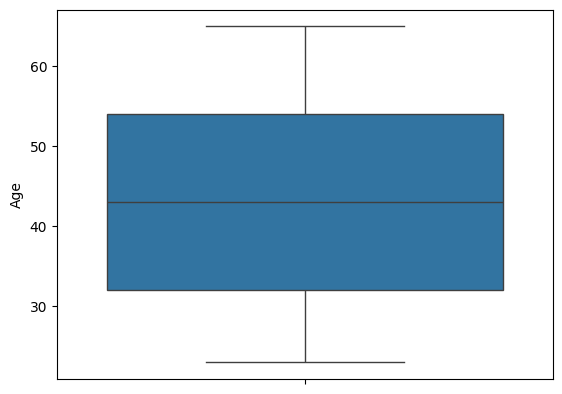

In [52]:
sns.boxplot(df['Age'])

<Axes: ylabel='Salary'>

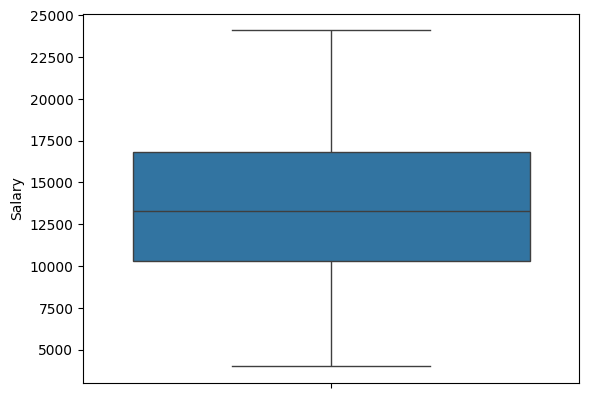

In [53]:
sns.boxplot(df['Salary'])

<Axes: xlabel='Job', ylabel='Salary'>

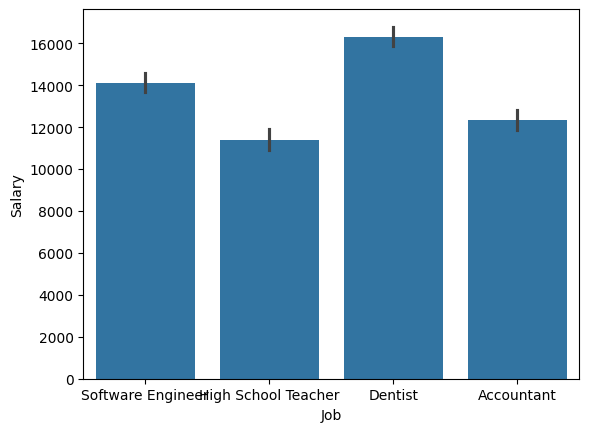

In [54]:
sns.barplot(data=df,x='Job',y='Salary')

<Axes: ylabel='Salary'>

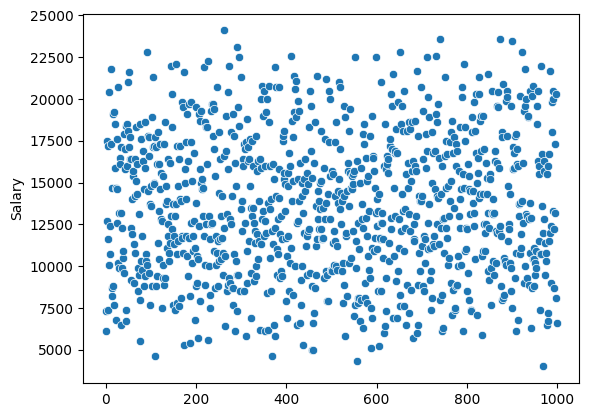

In [55]:
sns.scatterplot(df['Salary'])

<Axes: xlabel='Salary', ylabel='Age'>

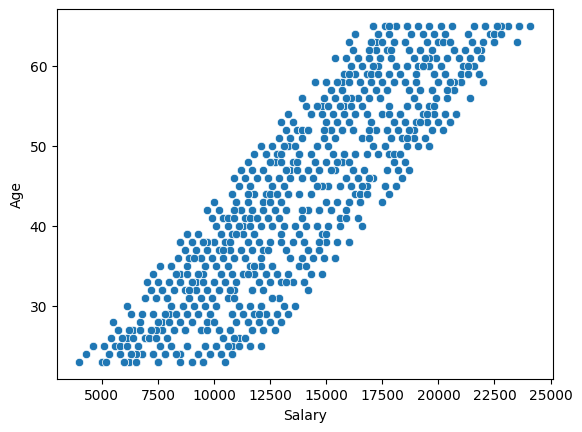

In [56]:
sns.scatterplot(data=df,x='Salary',y='Age')

In [57]:
df.columns

Index(['Name', 'Age', 'Job', 'Salary'], dtype='object')

In [58]:
df.shape

(1000, 4)

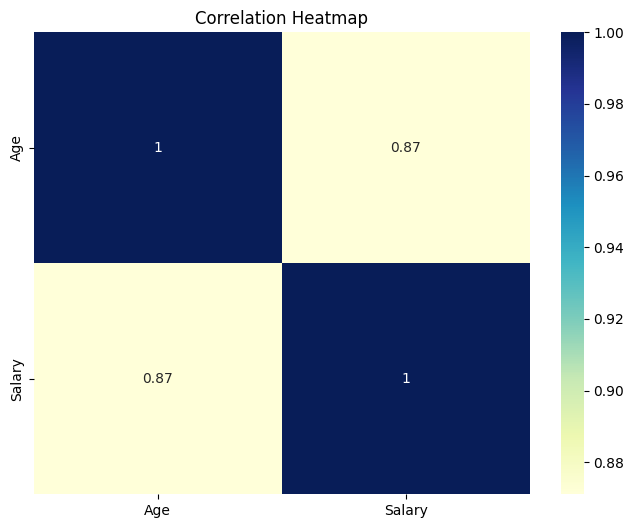

In [59]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
correlation_matrix = df[['Age', 'Salary']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title('Correlation Heatmap')
plt.show()

In [60]:
from scipy import stats

# Perform ANOVA test
grouped_data = [df['Salary'][df['Job'] == category] for category in df['Job'].unique()]
f_statistic, p_value = stats.f_oneway(*grouped_data)

print("F-statistic:", f_statistic)
print("P-value:", p_value)

alpha = 0.05  
if p_value < alpha:
    print('There is a Significant relationship')
else:
    print('There is No Significant relationship')

F-statistic: 82.29509160294326
P-value: 1.4410031835591835e-47
There is a Significant relationship


In [61]:
X = df[['Age','Job']]
y = df['Salary']

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42) 
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  


In [63]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(700, 2) (700,)
(150, 2) (150,)
(150, 2) (150,)


In [64]:

X_train = pd.get_dummies(X_train,columns=['Job'])
X_val = pd.get_dummies(X_val,columns=['Job'])
X_test = pd.get_dummies(X_test,columns=['Job'])

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [133]:
dtree = DecisionTreeRegressor(max_depth=6,min_samples_leaf=15,min_samples_split=25)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=15, min_samples_split=25)

In [134]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

prediction = dtree.predict(X_val)
print("MAE",mean_absolute_error(y_val,prediction))
print("MSE",mean_squared_error(y_val,prediction))
print("RMSE",np.sqrt(mean_squared_error(y_val,prediction)))
print("R2 Score",r2_score(y_val,prediction))

MAE 763.2052811314448
MSE 881640.5347558009
RMSE 938.9571527795083
R2 Score 0.9542630730168007


In [135]:
r2 = r2_score(y_val,prediction)
Ar2 = 1 - ((1-r2) * (X_val.shape[0] - 1)/(X_val.shape[0] -1 -1))
print("Adjusted R2",Ar2)

Adjusted R2 0.9539540397263737


[Text(0.5530660377358491, 0.9285714285714286, 'x[0] <= 42.5\nsquared_error = 18065938.347\nsamples = 700\nvalue = 13658.714'),
 Text(0.3419811320754717, 0.7857142857142857, 'x[2] <= 0.5\nsquared_error = 6858586.988\nsamples = 334\nvalue = 10258.982'),
 Text(0.23113207547169812, 0.6428571428571429, 'x[0] <= 33.5\nsquared_error = 4801663.844\nsamples = 249\nvalue = 9339.357'),
 Text(0.14150943396226415, 0.5, 'x[4] <= 0.5\nsquared_error = 2719555.789\nsamples = 148\nvalue = 8115.541'),
 Text(0.07547169811320754, 0.35714285714285715, 'x[0] <= 28.5\nsquared_error = 1905426.719\nsamples = 97\nvalue = 7362.887'),
 Text(0.03773584905660377, 0.21428571428571427, 'x[0] <= 26.5\nsquared_error = 1033905.304\nsamples = 53\nvalue = 6507.547'),
 Text(0.018867924528301886, 0.07142857142857142, 'squared_error = 675477.551\nsamples = 35\nvalue = 6122.857'),
 Text(0.05660377358490566, 0.07142857142857142, 'squared_error = 883580.247\nsamples = 18\nvalue = 7255.556'),
 Text(0.11320754716981132, 0.21428571

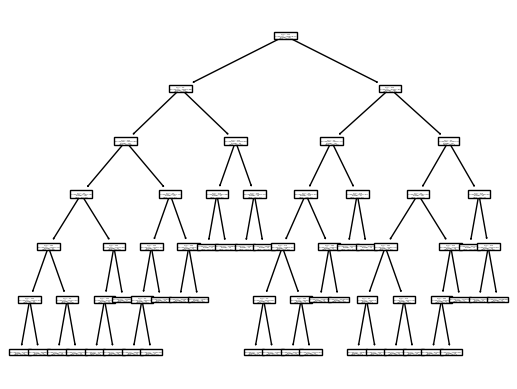

In [136]:

from sklearn.tree import plot_tree
plot_tree(dtree)